In [2]:
import requests
from bs4 import BeautifulSoup
import json
import re
import sys
import time
import random
import pandas as pd
import pymysql

def get_news(n_url):
    news_detail = []
    print(n_url)
    breq = requests.get(n_url, headers={'User-Agent':'Mozilla/5.0'})
    bsoup = BeautifulSoup(breq.content, 'html.parser')

    # news text
    _text = bsoup.select('#newsct_article')[0].get_text().replace('\n', " ")
    btext = _text.replace("// flash 오류를 우회하기 위한 함수 추가 function _flash_removeCallback() {}", "")
    news_detail.append(btext.strip())


    return news_detail


columns = ['내용']
df = pd.DataFrame(columns=columns)

query = '코로나'   # url 인코딩 에러는 encoding parse.quote(query)
s_date = "2022.05.01"
e_date = "2022.06.04"
s_from = s_date.replace(".", "")
e_to = e_date.replace(".", "")
page = 1


while True:
    time.sleep(random.sample(range(3), 1)[0])
    print(page)

    url = "https://search.naver.com/search.naver?where=news&query=" + query + \
        "&sort=1&field=1&ds=" + s_date + "&de=" + e_date + \
        "&nso=so%3Ar%2Cp%3Afrom" + s_from + "to" + e_to + \
        "%2Ca%3A&start=" + str(page)
    
    
    header = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }

    req = requests.get(url, headers=header)
    print(url)
    cont = req.content
    soup = BeautifulSoup(cont, 'html.parser')


    naver_news = soup.find_all("a", {"class": "info"})
    if naver_news == []:
        break


    for a_tag in naver_news:
        try:
            news_url = a_tag.attrs["href"]
            if news_url.startswith("https://news.naver.com"):
                print(news_url)
                news_detail = get_news(news_url)
                print(news_detail)
                df = df.append(pd.DataFrame(
                   [[news_detail[0]]], columns=columns))
        except Exception as e:
            print(e)
            continue
    break
    
    page += 10


# print(soup.select_one('.tit_view').get_text())
df

1
https://search.naver.com/search.naver?where=news&query=코로나&sort=1&field=1&ds=2022.05.01&de=2022.06.04&nso=so%3Ar%2Cp%3Afrom20220501to20220604%2Ca%3A&start=1
https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=106&oid=410&aid=0000872709
https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=106&oid=410&aid=0000872709
list index out of range
https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=102&oid=009&aid=0004973456
https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=102&oid=009&aid=0004973456
['인천국제공항 제1여객터미널 입국장.[사진 제공 = 연합뉴스]현충일 황금 연휴 첫날인 4일 인천국제공항 여객 수가 코로나19 사태 이후 최다치를 기록했다.인천국제공항공사에 따르면 이날 하루 인천공항 국제선을 찾은 이용객은 총 4만833명으로 예측됐다. 이는 코로나19 사태 초기인 2020년 3월 3일(3만5848명) 이후 가장 많은 이용객 수다.이번 연휴를 끼고 해외를 오가는 여객이 몰리면서 남은 5일과 6일까지 포함하면 사흘 연휴 동안 11만3000여명이 인천공항을 찾을 것으로 예상된다.']
https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=100&oid=052&aid=0001747618
https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=100&oid=052&aid=0001747618


/tmp/ipykernel_1144/565619624.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(


["[앵커]북한이 공개한 코로나19 의심 발열 환자가 누적 400만 명에 이르고 있습니다.북한은 겉으로는 방역 자신감을 과시하고 있지만, 세계보건기구에 변이 특성을 문의하는 등 정보의 상당 부분을 외부에 의존하는 형편입니다.조수현 기자가 보도합니다.[기자]북한 국가비상방역사령부는 지난 2일 오후 6시부터 24시간 동안 전국적으로 7만9천100여 명의 발열 환자가 새로 발생했다고 밝혔습니다.이에 따라 지난 4월 말부터 3일 오후까지 누적된 발열 환자는 399만6천여 명으로, 400만 명에 육박했습니다.북한은 사망자가 1명 늘어 누적 71명이 됐다며, 치명률은 0.002%라고 주장했습니다.그러나 환자 대비 사망자 비율을 고려하면 북한 통계를 그대로 신뢰하기 어렵다는 지적이 잇따릅니다.강력한 폐쇄 방역 조치에도 북·중 국경과 가까운 신의주 공장에서 종업원 집단 감염 사례가 공개되는 등 감염 확산 차단에 역부족인 겁니다.[이광혁 / 신의주 은하타올공장 기사장 : 5월 12일부터 공장 종업원 수의 40%에 해당한 유열자가 발생했는데, 지금은 5명 미만으로 감소됐습니다.]여기에, 북한 노동신문은 다양한 과학적 수단을 동원해 코로나19를 안정적으로 통제하고 있다며 자신감을 과시했는데, 실상은 선전 내용과 다른 것으로 보입니다.[정성장 / 세종연구소 북한연구센터장 : 어느 다른 나라보다 훌륭하게 방역에 성공하고 있다고 선전함으로써 김정은에 대한 숭배를 강화하기 위한 것이라고 봅니다.]실제로 북한 당국은 코로나 관련 정보를 습득하기 위해 외부와 소통에 나선 것으로 나타났습니다.세계보건기구 WHO는 북한 보건성이 코로나19 변이 바이러스 특성을 문의해와 관련 자료와 방역지침 권고안을 공유했다고 밝혔습니다.또, 개인보호장비 등 WHO가 공급할 수 있는 물품 목록을 전달하고 북한의 응답을 기다리고 있다고 설명했습니다.WHO 전문가들은 북한의 코로나 검사 역량과 병원 진료 체계에 과부하가 걸렸을 가능성을 우려하는가 하면, 북한이 발표한 통계와 달리 코로나 확산세가 악화하는 것으로 추

/tmp/ipykernel_1144/565619624.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(


['코로나19 대유행 이후 처음으로 외국인 성지순례객들이 사우디아라비아에 도착했다고 국영 SPA 통신이 4일(현지시간) 보도했습니다.  사우디 성지순례부는 이날 메디나의 모하메드 빈 압둘아지즈 국제공항에 인도네시아 성지순례객 358명이 도착했다고 전했습니다.  성지순례부는 "코로나 사태로 2년간 중단됐던 외국인 순례객을 맞이해 기쁘다"면서 "사우디는 신의 손님들을 맞을 준비를 완전히 마쳤다"고 밝혔습니다.  사우디는 코로나19 대유행이 시작된 2020년 외국인 무슬림에 대한 성지순례를 금지했습니다.  이후 사우디 당국은 성지순례객을 2020년엔 사우디에 거주하는 1천명, 2021년엔 6만명으로 제한했었습니다.[사진 출처 : 연합뉴스]']


/tmp/ipykernel_1144/565619624.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(


,내용
0,인천국제공항 제1여객터미널 입국장.[사진 제공 = 연합뉴스]현충일 황금 연휴 첫날인...
0,[앵커]북한이 공개한 코로나19 의심 발열 환자가 누적 400만 명에 이르고 있습니...
0,코로나19 대유행 이후 처음으로 외국인 성지순례객들이 사우디아라비아에 도착했다고 국...


In [16]:
get_news("https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=102&oid=022&aid=0003702192")

https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=102&oid=022&aid=0003702192


['대구 동구 신서동에 있는 신약개발지원센터 전경. 케이메디허브 제공    케이메디허브(대구경북첨단의료산업진흥재단)는 의료기업 이뮨메드와 공동연구로 신종 코로나바이러스 감염증(코로나19) 섬유화와 관련한 신규 치료 기전 유효물질을 개발했다고 3일 밝혔다.   연구진이 개발한 합성된 저분자 화합물은 항코로나19 바이러스 세포실험에서 렘데시비르 포함 3종의 대조 약물보다 우수한 치료효과와 낮은 독성을 나타냈다고 케이메디허브 측은 설명했다.   개발한 약물들은 신규 기전의 분자를 타깃으로 각각 적응증에 대한 후보물질 도출을 목표로 화합물의 최적화를 진행하고 있어 코로나19를 포함한 바이러스 치료제와 항섬유화 혁신신약 개발에 대한 기대를 높이고 있다.   케이메디허브는 앞으로 이뮨메드와 공동으로 국가과제지원 등 전임상 개발 지원 등을 통해 코로나19 바이러스 치료제와 항섬유화 신약 개발에 박차를 가할 예정이다.   양진영 케이메디허브 이사장은 “이번 성과는 선행연구 분석과 화합물의 정교한 디자인을 통해 얻은 유효물질들로 기존 라이브러리 검색보다 시간과 비용을 획기적으로 절감했다는 점에서 의미가 크다"면서 "앞으로도 기업들과 협업해 혁신 신약 개발 역량을 집중해 나갈 계획”이라고 말했다.']

In [3]:
df.to_csv('news_text.txt')

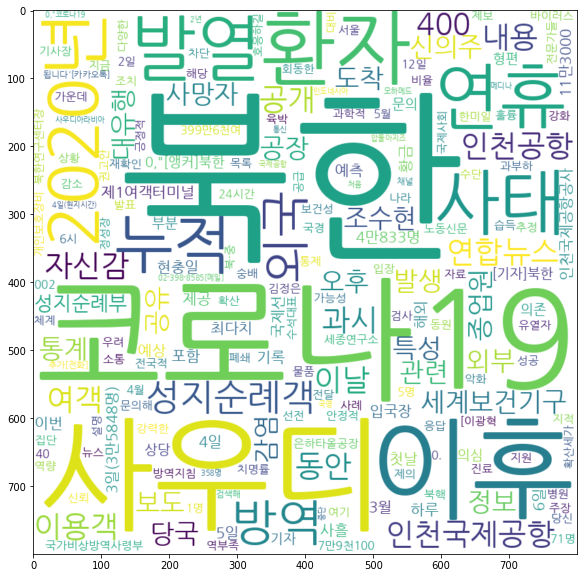

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter


import pandas as pd
from konlpy.tag import Hannanum
# wordcloud 그리기
hannanum = Hannanum()

f = open('news_text.txt', 'r', encoding='UTF8')
lines = f.readlines()
f.close()


def flatten(l):
        flatList = []
        for elem in l:
            if type(elem) == list:
                for e in elem:
                    flatList.append(e)
            else:
                flatList.append(elem)
        return flatList



# 한나눔 형태소 분석기로 명사만 추출
# 한국어 분석을 할 때는 명사 추출 분석이 가장 일반적임
temp = []
for i in range(len(lines)):
    temp.append(hannanum.nouns(lines[i]))
    
word_list = flatten(temp)
word_list = pd.Series([x for x in word_list if len(x) > 1])
# word_list.value_counts().head(10)

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width=800,
    height=800,
    background_color="white")

count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
fig.savefig('wordcloud.png')


